UNIVERSIDAD GALILEO

STATISTICAL LEARNING II

Marco Vinicio Escalante Lara

Carné: **19001148**

# PARTE No. 1

Feed Forward Network - Red neuronal tipo feedforward(multi-layer-perceptron)

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as mt

## Cargamos y mostramos los datos

Los datos provienen de la página https://www.kaggle.com/johnolafenwa/us-census-data, la cual ya divide el dataset en dos partes, una para entreno y la otra de prueba.

In [43]:
# Cargamos ambos datos, tanto la prueba como entreno
df_test = pd.read_csv('adult-test.csv')
df_train = pd.read_csv('adult-training.csv')

df_test.head()

,Edad,Tipo_empleo,ID,Educacion,Tiempo_estudio,Estado_civil,Tipo_trabajo,Familia,Raza,Sexo,Ganancias,Perdidas,Hora_Trabajo,Pais,Ingresos_mayores_50k
0,25,4,226802,2,7,1,7,3,2,1,0,0,40,United-States,0
1,38,4,89814,4,9,2,10,1,1,1,0,0,50,United-States,0
2,28,2,336951,3,12,2,12,1,1,1,0,0,40,United-States,1
3,44,4,160323,5,10,2,7,1,2,1,7688,0,40,United-States,1
4,18,0,103497,5,10,1,0,3,1,0,0,0,30,United-States,0


In [84]:
datos_x = ['Edad', 'Tipo_empleo','Educacion','Tiempo_estudio','Estado_civil', 'Tipo_trabajo',
           'Sexo', 'Hora_Trabajo', 'Raza', 'Familia', 'Ganancias', 'Perdidas']
x_train=df_train[datos_x]
x_test=df_test[datos_x]
y_train = df_train['Ingresos_mayores_50k']
y_test=df_test['Ingresos_mayores_50k']
print(df_train.shape, df_test.shape)

(32561, 15) (16281, 15)


## Modelo de perceptrones multicapa (MLP)
Ahora se entrenará una red neuronal artificial utilizando capas densas y función de activación softmax. La función de costos para compilar el modelo consiste en una "categorical crossentropy", ya que tenemos nuestro dato de salida como una variable categorica

In [24]:
# Librerias utilazadas para nuestro modelo
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [157]:
# Definición del modelo
model = Sequential()
model.add(Dense(2, input_dim=x_train.shape[1], activation='softmax'))
# Compilando el modelo          
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# Resumen del modelo
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 2)                 26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [158]:
# Entrenando el modelo 
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, batch_size=800, epochs=80,verbose=1, validation_split=0.2) 


Train on 26048 samples, validate on 6513 samples
Epoch 1/80
26048/26048 [==============================] - 0s 4us/sample - loss: 3.5413 - accuracy: 0.7656 - val_loss: 3.5711 - val_accuracy: 0.7784
Epoch 2/80
26048/26048 [==============================] - 0s 2us/sample - loss: 3.5582 - accuracy: 0.7792 - val_loss: 3.5711 - val_accuracy: 0.7784
Epoch 3/80
26048/26048 [==============================] - 0s 3us/sample - loss: 3.5582 - accuracy: 0.7792 - val_loss: 3.5711 - val_accuracy: 0.7784
Epoch 4/80
26048/26048 [==============================] - 0s 3us/sample - loss: 3.5581 - accuracy: 0.7792 - val_loss: 3.5711 - val_accuracy: 0.7784
Epoch 5/80
26048/26048 [==============================] - 0s 3us/sample - loss: 3.5581 - accuracy: 0.7792 - val_loss: 3.5711 - val_accuracy: 0.7784
Epoch 6/80
26048/26048 [==============================] - 0s 5us/sample - loss: 3.5581 - accuracy: 0.7792 - val_loss: 3.5711 - val_accuracy: 0.7784
Epoch 7/80
26048/26048 [==============================] - 0s 5u

26048/26048 [==============================] - 0s 2us/sample - loss: 3.8618 - accuracy: 0.7604 - val_loss: 3.9596 - val_accuracy: 0.7543
Epoch 55/80
26048/26048 [==============================] - 0s 3us/sample - loss: 3.8618 - accuracy: 0.7604 - val_loss: 3.9596 - val_accuracy: 0.7543
Epoch 56/80
26048/26048 [==============================] - 0s 2us/sample - loss: 3.8618 - accuracy: 0.7604 - val_loss: 3.9596 - val_accuracy: 0.7543
Epoch 57/80
26048/26048 [==============================] - 0s 2us/sample - loss: 3.8618 - accuracy: 0.7604 - val_loss: 3.9596 - val_accuracy: 0.7543
Epoch 58/80
26048/26048 [==============================] - 0s 5us/sample - loss: 3.8618 - accuracy: 0.7604 - val_loss: 3.9596 - val_accuracy: 0.7543
Epoch 59/80
26048/26048 [==============================] - 0s 5us/sample - loss: 3.8618 - accuracy: 0.7604 - val_loss: 3.9596 - val_accuracy: 0.7543
Epoch 60/80
26048/26048 [==============================] - 0s 5us/sample - loss: 3.8618 - accuracy: 0.7604 - val_loss:

In [159]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Resultados del Test de score:', score[0]) 
print('Resultados del Test accuracy:', score[1])

Resultados del Test de score: 3.8075177237234965
Resultados del Test accuracy: 0.76377374


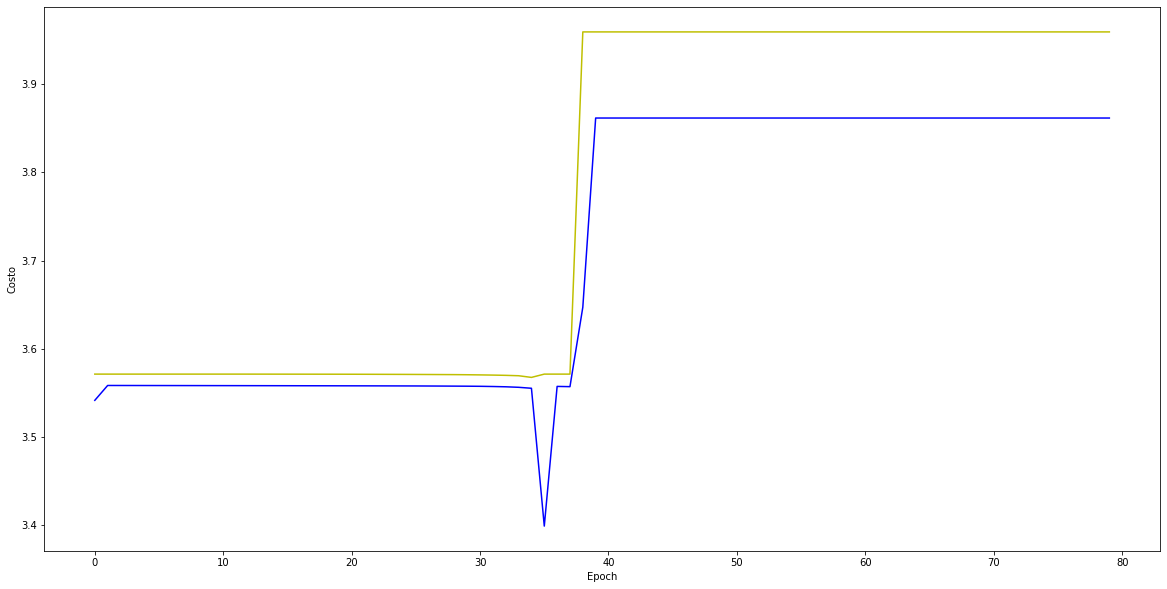

In [160]:
# Graficar la función de costo
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], label="Entreno", color="b")
plt.plot(history.history['val_loss'], label="Validacion", color = "y")
plt.xlabel("Epoch")
plt.ylabel("Costo");

A pesar de que no se trata de una regresión lineal quisimos mostrar los valores de los errores medios cuadraticos y el R² para ver su comportamiento.

In [161]:
print("RMSE= %0.4f, R^2 = %0.2f" % (np.sqrt(mt.mean_squared_error(y_test, predicts)), 
                                   r2_score(y_test, predicts)))

RMSE= 0.4203, R^2 = 0.02


## CONCLUSIONES

Como pudimos ver en los resultados, en lo que respecta la exactitud, se puede ver que la misma va incrementando conforme va aumentando las corridas del mismo.

El emplear los datos de manera corregida facilita la toma de desiciones, es por esto que tener una dataset lo más estructurado posible.

Si se hubieran empleados feuture enginerring podrian mejorarse los resultados ya que actualmente estan los datos casi crudos sin mayor cambios.

Es interesante como clasifica de bien el programa los datos con lo que trabajamos.